# 2022 NZMSA Data Science Submission.

In [1]:
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

%matplotlib inline

# Exploratory Data Analysis.

In [2]:
dataset = pd.read_csv("weather-data.csv")
dataset.head() # Show the first five results.

,station,valid,tmpc,dwpc,relh,sknt,gust,peak_wind_drct
0,NZAA,2015-01-01 00:00,21.0,11.0,52.77,15.0,NaN,NaN
1,NZAA,2015-01-01 00:30,21.0,10.0,49.37,16.0,NaN,NaN
2,NZAA,2015-01-01 01:00,21.0,12.0,56.38,16.0,NaN,NaN
3,NZAA,2015-01-01 01:30,21.0,13.0,60.21,16.0,NaN,NaN
4,NZAA,2015-01-01 02:00,21.0,12.0,56.38,16.0,NaN,NaN


In [3]:

print(dataset.info()) ##this is to check if there is anything in the data we have to clean.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103713 entries, 0 to 103712
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0    station        103713 non-null  object 
 1   valid           103713 non-null  object 
 2   tmpc            103678 non-null  float64
 3   dwpc            103678 non-null  float64
 4   relh            103593 non-null  float64
 5   sknt            103704 non-null  float64
 6   gust            1203 non-null    float64
 7   peak_wind_drct  0 non-null       float64
dtypes: float64(6), object(2)
memory usage: 6.3+ MB
None


In [4]:
dataset.isnull().sum()

 station               0
valid                  0
tmpc                  35
dwpc                  35
relh                 120
sknt                   9
gust              102510
peak_wind_drct    103713
dtype: int64

We can see that peak_wind_drct has 0 non null values, that is all values are null, so we can delete this column from the dataset.
we can also see that there are only 1203 values recorded for gust, will keep it in for now to see dataset general stats.

In [5]:
dataset = dataset.drop('peak_wind_drct', axis=1)
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103713 entries, 0 to 103712
Data columns (total 7 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0    station  103713 non-null  object 
 1   valid     103713 non-null  object 
 2   tmpc      103678 non-null  float64
 3   dwpc      103678 non-null  float64
 4   relh      103593 non-null  float64
 5   sknt      103704 non-null  float64
 6   gust      1203 non-null    float64
dtypes: float64(5), object(2)
memory usage: 5.5+ MB
None


In [6]:
print(dataset.describe())

                tmpc           dwpc           relh           sknt         gust
count  103678.000000  103678.000000  103593.000000  103704.000000  1203.000000
mean       15.811503      12.115772      79.782307       8.919029    30.962594
std         4.235197       3.738005      12.562199       5.348379     6.319510
min         2.000000      -2.000000      29.230000       0.000000    13.000000
25%        13.000000       9.000000      71.450000       5.000000    27.000000
50%        16.000000      12.000000      81.990000       8.000000    31.000000
75%        19.000000      15.000000      88.180000      12.000000    35.000000
max        29.000000      23.000000     100.000000      42.000000    56.000000


From the description of the dataset above, we can see that for tmpc, 
the mean is 15.81 with a standard deviation of 4.24 and an interquatile range between 13.0 and 19.0.

For dwpc 
the mean is 12.11 with a standard deviation of 3.73 and an interquatile range between 9.0 and 15.0.

For relh 
the mean is  79.78 with a standard deviation of 12.56 and an interquatile range between 71.45  and 88.18.

For  sknt the mean is 8.92  with a standard deviation of 5.35 and an interquatile range between 5.0 and 12.0.

For gust 
the mean is 30.96 with a standard deviation of 6.32 and an interquatile range between 27.0 and 56.0.


It seems that a lot of the data was taken at the same station, will now run code to check.

In [7]:
dataset[' station'].unique()

array(['NZAA'], dtype=object)

The only unique entry is NZAA and so we can delete the column

In [8]:
dataset = dataset.drop(' station', axis=1)
dataset.head()

,valid,tmpc,dwpc,relh,sknt,gust
0,2015-01-01 00:00,21.0,11.0,52.77,15.0,NaN
1,2015-01-01 00:30,21.0,10.0,49.37,16.0,NaN
2,2015-01-01 01:00,21.0,12.0,56.38,16.0,NaN
3,2015-01-01 01:30,21.0,13.0,60.21,16.0,NaN
4,2015-01-01 02:00,21.0,12.0,56.38,16.0,NaN


Now we're going to process the date column, we expect a cyclical pattern for weather over years and months and time of day and so we're going to split it as such.

First we're going to see what the type of the column is.

In [9]:
dataset[['year','month','day']] = dataset.valid.str.split('-',expand=True)




In [10]:
dataset = dataset.drop('valid', axis=1)
dataset.head()

,tmpc,dwpc,relh,sknt,gust,year,month,day
0,21.0,11.0,52.77,15.0,NaN,2015,01,01 00:00
1,21.0,10.0,49.37,16.0,NaN,2015,01,01 00:30
2,21.0,12.0,56.38,16.0,NaN,2015,01,01 01:00
3,21.0,13.0,60.21,16.0,NaN,2015,01,01 01:30
4,21.0,12.0,56.38,16.0,NaN,2015,01,01 02:00


In [11]:

dataset[["dayNumber","time"]] = dataset.day.str.split(" ",expand=True)
dataset.head()

,tmpc,dwpc,relh,sknt,gust,year,month,day,dayNumber,time
0,21.0,11.0,52.77,15.0,NaN,2015,01,01 00:00,01,00:00
1,21.0,10.0,49.37,16.0,NaN,2015,01,01 00:30,01,00:30
2,21.0,12.0,56.38,16.0,NaN,2015,01,01 01:00,01,01:00
3,21.0,13.0,60.21,16.0,NaN,2015,01,01 01:30,01,01:30
4,21.0,12.0,56.38,16.0,NaN,2015,01,01 02:00,01,02:00


In [12]:
dataset = dataset.drop('day', axis=1)
dataset.head()

,tmpc,dwpc,relh,sknt,gust,year,month,dayNumber,time
0,21.0,11.0,52.77,15.0,NaN,2015,01,01,00:00
1,21.0,10.0,49.37,16.0,NaN,2015,01,01,00:30
2,21.0,12.0,56.38,16.0,NaN,2015,01,01,01:00
3,21.0,13.0,60.21,16.0,NaN,2015,01,01,01:30
4,21.0,12.0,56.38,16.0,NaN,2015,01,01,02:00


In [13]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103713 entries, 0 to 103712
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   tmpc       103678 non-null  float64
 1   dwpc       103678 non-null  float64
 2   relh       103593 non-null  float64
 3   sknt       103704 non-null  float64
 4   gust       1203 non-null    float64
 5   year       103713 non-null  object 
 6   month      103713 non-null  object 
 7   dayNumber  103713 non-null  object 
 8   time       103713 non-null  object 
dtypes: float64(5), object(4)
memory usage: 7.1+ MB
None


now to conver the year month day and time to integers, will convers time to time in minutes with 2359 being 1439.

In [14]:
dataset["year"] = dataset["year"].astype("int64")
dataset["month"] = dataset["month"].astype("int64")
dataset["dayNumber"] = dataset["dayNumber"].astype("int64")

print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103713 entries, 0 to 103712
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   tmpc       103678 non-null  float64
 1   dwpc       103678 non-null  float64
 2   relh       103593 non-null  float64
 3   sknt       103704 non-null  float64
 4   gust       1203 non-null    float64
 5   year       103713 non-null  int64  
 6   month      103713 non-null  int64  
 7   dayNumber  103713 non-null  int64  
 8   time       103713 non-null  object 
dtypes: float64(5), int64(3), object(1)
memory usage: 7.1+ MB
None


In [15]:
dataset["time"]= (dataset.time.str.split(":",expand=True)[0]).astype("int64")*60 +(dataset.time.str.split(":",expand=True)[1].astype("int64"))

dataset.head()

,tmpc,dwpc,relh,sknt,gust,year,month,dayNumber,time
0,21.0,11.0,52.77,15.0,NaN,2015,1,1,0
1,21.0,10.0,49.37,16.0,NaN,2015,1,1,30
2,21.0,12.0,56.38,16.0,NaN,2015,1,1,60
3,21.0,13.0,60.21,16.0,NaN,2015,1,1,90
4,21.0,12.0,56.38,16.0,NaN,2015,1,1,120


In [16]:
print(dataset.info())
dataset.rename(columns = {'dayNumber':'day'}, inplace = True)
dataset.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103713 entries, 0 to 103712
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   tmpc       103678 non-null  float64
 1   dwpc       103678 non-null  float64
 2   relh       103593 non-null  float64
 3   sknt       103704 non-null  float64
 4   gust       1203 non-null    float64
 5   year       103713 non-null  int64  
 6   month      103713 non-null  int64  
 7   dayNumber  103713 non-null  int64  
 8   time       103713 non-null  int64  
dtypes: float64(5), int64(4)
memory usage: 7.1 MB
None


,tmpc,dwpc,relh,sknt,gust,year,month,day,time
0,21.0,11.0,52.77,15.0,NaN,2015,1,1,0
1,21.0,10.0,49.37,16.0,NaN,2015,1,1,30
2,21.0,12.0,56.38,16.0,NaN,2015,1,1,60
3,21.0,13.0,60.21,16.0,NaN,2015,1,1,90
4,21.0,12.0,56.38,16.0,NaN,2015,1,1,120


We should expect cyclic weather across the year because of the seasons and also in minutes because similar times should have similar weather. But we can combine month and day for just a day in the month.

In [17]:

def month_to_days(month):
    if month ==1:
        return 0
    elif month ==2:
        return 31
    elif month ==3:
        return 60
    elif month ==4:
        return 91
    elif month ==5:
        return 121
    elif month == 6:
        return 152
    elif month==7:
        return 182
    elif month ==8:
        return 213
    elif month ==9:
        return 244
    elif month ==10:
        return 274
    elif month==11:
        return 305
    elif month ==12:
        return 335
dataset['month'] = dataset['month'].map(month_to_days)

In [18]:
dataset['month'].unique()

array([  0,  31,  60,  91, 121, 152, 182, 213, 244, 274, 305, 335],
      dtype=int64)

In [19]:
dataset['day']= dataset['day']+dataset['month']

In [20]:
dataset= dataset.drop("month",axis=1)
dataset.head()

,tmpc,dwpc,relh,sknt,gust,year,day,time
0,21.0,11.0,52.77,15.0,NaN,2015,1,0
1,21.0,10.0,49.37,16.0,NaN,2015,1,30
2,21.0,12.0,56.38,16.0,NaN,2015,1,60
3,21.0,13.0,60.21,16.0,NaN,2015,1,90
4,21.0,12.0,56.38,16.0,NaN,2015,1,120


<AxesSubplot:>

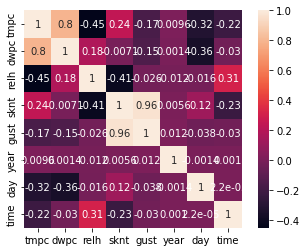

In [21]:
sns.heatmap(dataset.corr(), annot=True, square=True)

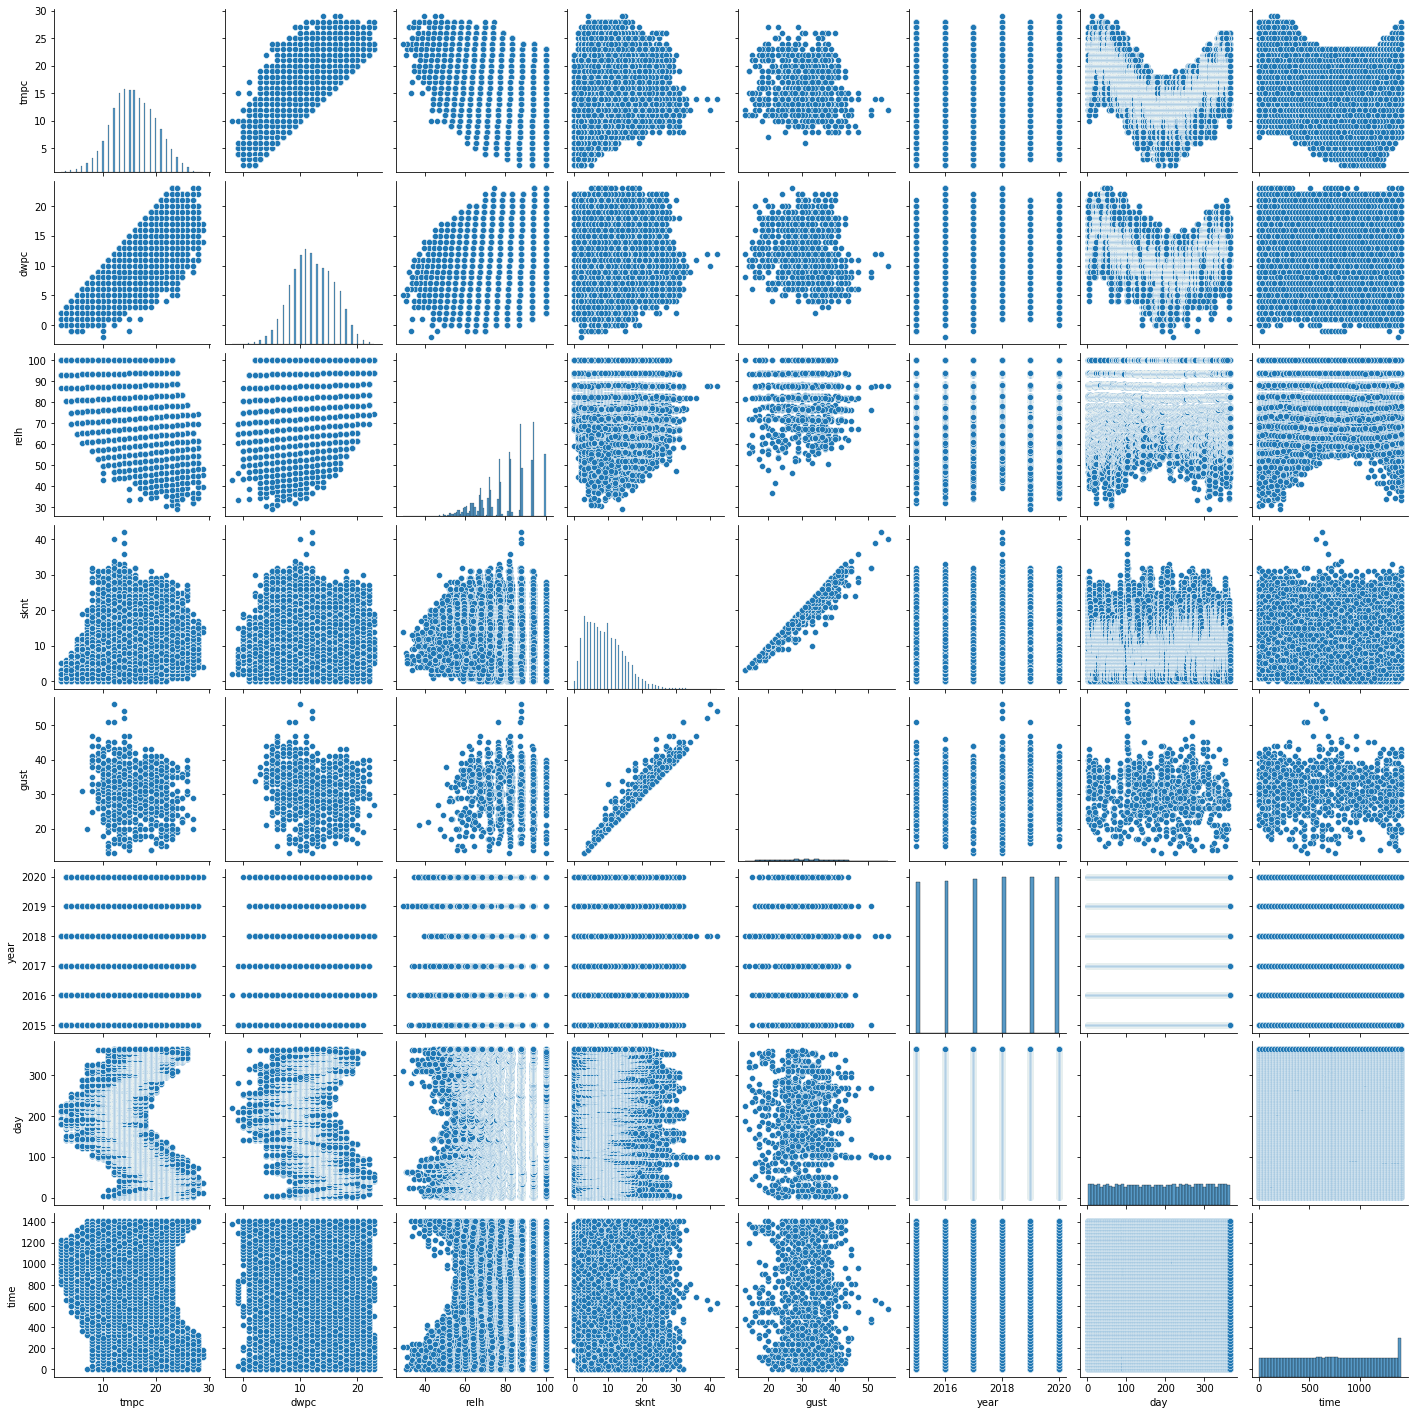

In [22]:
sns.pairplot(dataset )

ignoring the relationships between weather data and themselves and time and themselves can indeed see some kind of cyclic relationship through each days and each year while there seems to be a similar range of each year in the data.

We're gonna map  day time against the weather data.
first we're gonna simplify the data by only taking one value per unique day

In [42]:
df2 = dataset.drop(dataset[dataset.time != 0].index)

df2 = df2.drop('time', axis=1)
df2.head()


<class 'pandas.core.frame.DataFrame'>


,tmpc,dwpc,relh,sknt,gust,year,day
0,21.0,11.0,52.77,15.0,NaN,2015,1
48,22.0,14.0,60.44,9.0,NaN,2015,2
96,20.0,15.0,72.92,11.0,NaN,2015,3
144,24.0,17.0,64.91,6.0,NaN,2015,4
192,22.0,17.0,73.27,9.0,NaN,2015,5


In [43]:
df2015 = df2.drop(df2[df2.year != 2015].index)
df2016 = df2.drop(df2[df2.year != 2016].index)
df2017 = df2.drop(df2[df2.year != 2017].index)
df2018 = df2.drop(df2[df2.year != 2018].index)
df2019 = df2.drop(df2[df2.year != 2019].index)
df2020 = df2.drop(df2[df2.year != 2020].index)

<class 'pandas.core.frame.DataFrame'>


We havecreated a new dataframe where the it isonly the times at midnight so we drop time and create separate dataframes for each year

AttributeError: 'numpy.ndarray' object has no attribute 'plot'

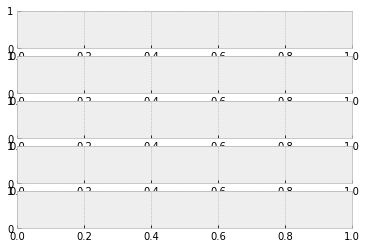

In [45]:
plt.style.use("bmh")
fig, (ax1) = plt.subplots(nrows=5, ncols=1, squeeze=True)

ax1.plot(df2015["day"], df2015["tmpc"], color="blue")
ax1.plot(df2016["day"], df2016["tmpc"], color="red")
ax1.plot(df2017["day"], df2017["tmpc"], color="green")
ax1.plot(df2018["day"], df2018["tmpc"], color="orange")
ax1.plot(df2019["day"], df2019["tmpc"], color="purple")
ax1.plot(df2020["day"], df2020["tmpc"], color="yellow")
ax1.set_title("tmpc against days")
ax1.set_xlabel("X")
ax1.set_ylabel("Y1")





fig.set_size_inches(10,25)

fig.show()

# Data Processing

In [ ]:
# An exhaustive list of what you can do with Pandas dataframe is in this link: https://pandas.pydata.org/docs/reference/frame.html

# Data Modelling

In [ ]:
# An exhaustive list of models can be found in sci-kit learn in this link: https://scikit-learn.org/stable/supervised_learning.html
# The url takes you to supervised learning which is what you will be dealing with for this phase.

# Conclusion

* Comment on your model performance.
* Anything interesting about the data analysis.